# Загрузка данных

Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

Этот набор данных содержит информацию об электронной коммерции в США за 2020 год. В таблице есть поля:
* `Order Date` - дата заказа,
* `Row ID` - идентификатор записи,
* `Order ID` - идентификатор заказа,
* `Ship Mode` - тип доставки,
* `Customer ID` - идентификатор покупателя,
* `Segment` - сегмент покупателя,
* `Country` - страна покупателя,
* `City` - город покупателя,
* `State` - штат покупателя,
* `Postal Code` - почтовый индекс,
* `Region` - регион покупателя,
* `Product ID` - идентификатор продукта,
* `Category` - категория продукта,
* `Sub-Category` - подкатегория продукта,
* `Product Name` - название продукта,
* `Sales` - сумма продаж, $,
* `Quantity` - количество проданного товара,
* `Discount` - доля скидки,
* `Profit` - прибыль после вычета себестоимости.

In [1]:
# Импортируем библиотеки
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
# Загружаем данные в датафрейм
df = pd.read_csv('/content/drive/MyDrive/zerocod/z_14/amazon/amazon_market_data.csv')

In [3]:
# Смотрим основную информацию по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [4]:
# Выводим первые строки датафрейма
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


**Вывод:**

* В датафрейме 19 колонок и 3312 строк.
* Названия колонок не соответствует рекомендуемому стилю.
* Колонка с датой `Order Date` имеет несоответствующий тип данных. Остальные колонки соответствуют своим значениям и присвоенным им типам данных.
* Все колонки заполнены без пропусков.

# Приведение столбцов к стилю snake_case

In [5]:
# Составим функцию для переименования столбцов
def to_snake_case(column_name):
    column_name = re.sub(r'[ -]', '_', column_name)
    return column_name.lower()

# Применяем ко всем колонкам
df.columns = [to_snake_case(col) for col in df.columns]

In [6]:
# Проверяем результат
df.columns

Index(['order_date', 'row_id', 'order_id', 'ship_mode', 'customer_id',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

# Приведение типов данных

После первого знакомства с данными видно, что дата находится в формате "день-месяц-год" в виде строки.

In [7]:
# Приводим колонки с датами к типу datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%y')

In [8]:
# Проверим диапазоны дат
print(df['order_date'].min(), '-', df['order_date'].max())

2020-01-01 00:00:00 - 2020-12-30 00:00:00


In [9]:
# Проверим результат
df['order_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3312 entries, 0 to 3311
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
3312 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 26.0 KB


**Вывод:**

* Колонка `order_date` приведена к типу данных "datetime64[ns]".
* Даты заказов находятся в диапазоне 2020-01-01 - 2020-12-30.

# Поиск дублей и пропусков в данных

In [10]:
# Посмотрим наличие дубликатов в колонке 'row_id'
df['row_id'].duplicated().sum()

np.int64(0)

В колонке `row_id` содержатся только уникальные значения, аналог индекса датафрейма. Её можно удалить, она не понадобится для исследования.

In [11]:
# Удаляем колонку 'row_id'
df = df.drop('row_id', axis=1)

Приведем идентификаторы к одному стилю написания, чтобы избавиться от возможных ошибок.

In [12]:
# Удаляем из колонок лишние пробелы и приводим все буквы к нижнему регистру
df['order_id'] = df['order_id'].str.strip().str.lower()
df['customer_id'] = df['customer_id'].str.strip().str.lower()
df['product_id'] = df['product_id'].str.strip().str.lower()

In [13]:
# Проверим наличие дубликатов в датафрейме
df.duplicated().sum()

np.int64(0)

Проверим распределение числовых значений и уникальные категориальные значения, чтобы выявить ошибки или неявные дубликаты.

In [14]:
# Посмотрим базовую статистику в колонках с числами
df[['sales', 'quantity', 'discount', 'profit']].describe()

,sales,quantity,discount,profit
count,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340
std,585.257531,2.221776,0.207429,241.864342
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.018000,2.000000,0.000000,1.763200
50%,53.810000,3.000000,0.200000,8.296800
75%,205.105700,5.000000,0.200000,28.315125
max,13999.960000,14.000000,0.800000,6719.980800


В продажах можно заметить явный перекос и выбросы, но такие значения вполне могут быть и это не похоже на ошибку. В колонке с прибылью видеть отрицательные значения, тоже нормальное явление, так происходит, когда себестоимость превышает доход или была слишком большая скидка. В остальных колонках адекватные значения, ошибок не видно.

In [15]:
# Сохраним список столбцов с категориальными данными
categorical_columns = ['ship_mode', 'segment', 'country', 'city', 'state',
                       'region', 'category', 'sub_category', 'product_name']

# Посмотрим базовую статистику в этих столбцах
df[categorical_columns].describe()

,ship_mode,segment,country,city,state,region,category,sub_category,product_name
count,3312,3312,3312,3312,3312,3312,3312,3312,3312
unique,4,3,1,350,47,4,3,17,1511
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,Easy-staple paper
freq,1897,1668,3312,306,663,1095,2002,500,16


Все заказы и пользователи представлены из одной страны, США.

In [16]:
# Оставим колонки, которые можно просмотреть визуально
columns_for_viewing = ['ship_mode', 'segment', 'state',
                       'region', 'category', 'sub_category']

# Посмотрим на уникальные значения в категориальных данных
for col in columns_for_viewing:
  print(f'{col}')
  print(df[col].unique())
  print('---' * 20)

ship_mode
['Standard Class' 'First Class' 'Second Class' 'Same Day']
------------------------------------------------------------
segment
['Consumer' 'Home Office' 'Corporate']
------------------------------------------------------------
state
['Ohio' 'California' 'Wisconsin' 'Texas' 'North Carolina' 'Alabama'
 'Michigan' 'Florida' 'Washington' 'Pennsylvania' 'District of Columbia'
 'Missouri' 'Colorado' 'Tennessee' 'Indiana' 'Massachusetts' 'Vermont'
 'New York' 'Connecticut' 'Illinois' 'Montana' 'Arizona' 'Georgia'
 'Kansas' 'Iowa' 'Virginia' 'Maryland' 'Minnesota' 'Louisiana'
 'New Jersey' 'Oklahoma' 'Delaware' 'Kentucky' 'Mississippi' 'Arkansas'
 'New Mexico' 'South Carolina' 'Rhode Island' 'Nevada' 'Oregon'
 'North Dakota' 'Idaho' 'New Hampshire' 'Nebraska' 'West Virginia'
 'South Dakota' 'Utah']
------------------------------------------------------------
region
['East' 'West' 'Central' 'South']
------------------------------------------------------------
category
['Furniture' 'O

Неявных дубликатов в этих столбцах не наблюдается.

In [17]:
# Посмотрим названия городов, которые встречаются один раз
df['city'].value_counts().sort_values()[:10]

,count
city,
East Orange,1
Danbury,1
Port Orange,1
Hagerstown,1
Utica,1
Elyria,1
Oxnard,1
Amarillo,1
Des Plaines,1


Колонки `city`, `product_name` трудно просмотреть вручную, там слишком много записей. Можно попробовать привести колонки к единому текстовому стилю, например, все буквы сделать строчными и убрать двойственные пробелы, после сверить количество уникальных значений с первоначальным столбцом. Таким образом мы проверим записи на возможные ошибки, если один и тот же город или продукт записан в разном стиле.

In [18]:
# Приведем записи к единому стилю и посчитаем уникальные значения
city_nunique = (df['city'].str.strip().str.lower()
                          .str.replace(r'[^\w\s]', '', regex=True)
                          .str.replace(r'\s+', ' ', regex=True)
                          .nunique())
name_product_nunique = (df['product_name'].str.strip().str.lower()
                          .str.replace(r'\s+', ' ', regex=True)
                          .nunique())

Этот код не изменяет исходные колонки, в датафрейме они остались в оригинальном виде.

In [19]:
# Проверяем столбец с городами
if df['city'].nunique() == city_nunique:
  print('Количество уникальных значений сходится')
else:
  print('В названиях городов есть неявные дубликаты')

Количество уникальных значений сходится


In [20]:
# Проверяем столбец с названием товаров
if df['product_name'].nunique() == name_product_nunique:
  print('Количество уникальных значений сходится')
else:
  print('В названиях товара есть неявные дубликаты')

Количество уникальных значений сходится


В проверяемых колонках уникальных записей со строчными буквами столько же, как в оригинальном виде. Но утверждать, что там отсутствуют ошибки нельзя, так как могут присутствовать ошибки другого рода. Например, один город с полным названием и сокращенным. Пока остановимся на сделанных проверках, если в ходе дальнейшего анализа обнаружим скрытые ошибки, то вернемся к их исправлению.

**Вывод:**

Явных и неявных дубликатов и ошибок не обнаружено. Можно приступать к исследовательскому анализу.

# Исследовательский анализ данных

**Проверим количество уникальных заказов и уникальных покупателей**

In [21]:
# Проверим количество уникальных заказов
orders_nuniq = df['order_id'].nunique()
print(f'Количество уникальных заказов: {orders_nuniq}')

Количество уникальных заказов: 1687


In [22]:
# Проверим количество уникальных покупателей
users_nuniq = df['customer_id'].nunique()
print(f'Количество уникальных покупателей: {users_nuniq}')

Количество уникальных покупателей: 693


В наших данных 1687 уникальных заказов и 693 уникальных покупателя. Это значит, что некоторые клиенты делали несколько заказов. В среднем на одного покупателя выходит два заказа.

**Изучим распределение доходности от заказов**

In [23]:
# Посчитаем продажи со скидкой
df['discount_sales'] = df['sales'] - (df['sales'] * df['discount'])

# Посчитаем суммы продаж для каждого заказа
sum_sales_orders = df.groupby('order_id')['discount_sales'].sum()

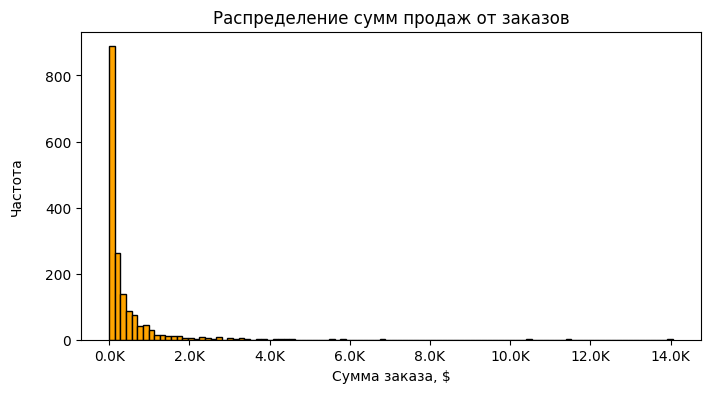

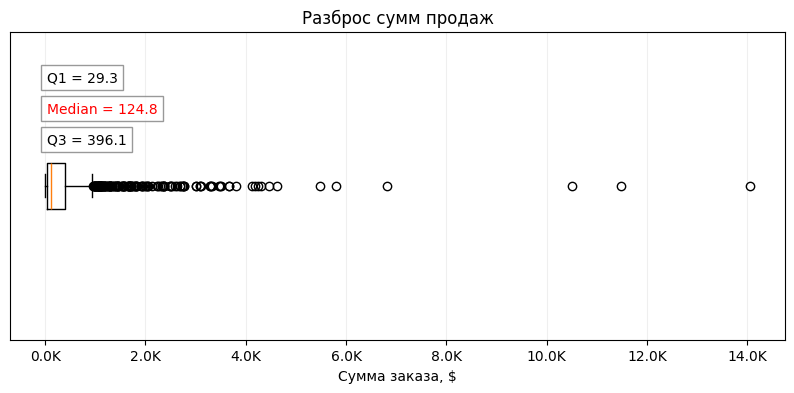

In [24]:
# Построение гистограммы
plt.figure(figsize=(8, 4))
plt.hist(sum_sales_orders, color='orange', bins=100, edgecolor='black')
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.1f}K'))
# Настройка отображения
plt.title('Распределение сумм продаж от заказов')
plt.xlabel('Сумма заказа, $')
plt.ylabel('Частота', labelpad=15)
plt.grid(False)
plt.show()

# Построение ящика с усами
plt.figure(figsize=(10, 4))
plt.boxplot(sum_sales_orders, vert=False)
# Вычисляем квартили вручную для точности
q1, q2, q3 = np.percentile(sum_sales_orders, [25, 50, 75])
# Добавляем подписи квартилей
plt.text(q1, 1.35, f'Q1 = {q1:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.25, f'Median = {q2:,.1f}', ha='left', va='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.text(q1, 1.15, f'Q3 = {q3:,.1f}', ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000:.1f}K'))
# Настройка отображения
plt.title('Разброс сумм продаж')
plt.xlabel('Сумма заказа, $')
plt.yticks([])
plt.grid(axis='x', alpha=0.2)
plt.show()

In [25]:
# Рассчитываем квантили и IQR
Q1 = sum_sales_orders.quantile(0.25)
Q3 = sum_sales_orders.quantile(0.75)
IQR = Q3 - Q1

# Определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы (значения за границами)
outliers_mask = (sum_sales_orders > upper_bound)

# Считаем количество и долю выбросов
number_of_outliers = outliers_mask.sum()
percentage_of_outliers = (number_of_outliers / len(sum_sales_orders)) * 100
print(f'За верхней границей лежит {round(percentage_of_outliers)}% значений')

За верхней границей лежит 9% значений


Распределение правое асимметричное, что говорит о преимуществе небольших покупок. 50% заказов делают на сумму от 29.3 до 396.1 \$, с медианой - 124.8 \$. 9% от всех заказов сделаны на сумму более 1,000 \$, из них очень редкие заказы, сумма которых превышает 6,000 $.

**Изучим локации пользователей**

Начнем исследование с региона проживания.

In [26]:
# Посчитаем количество пользователей в регионах
cnt_users_per_region = df.groupby('region')['customer_id'].nunique().sort_values(ascending=False)

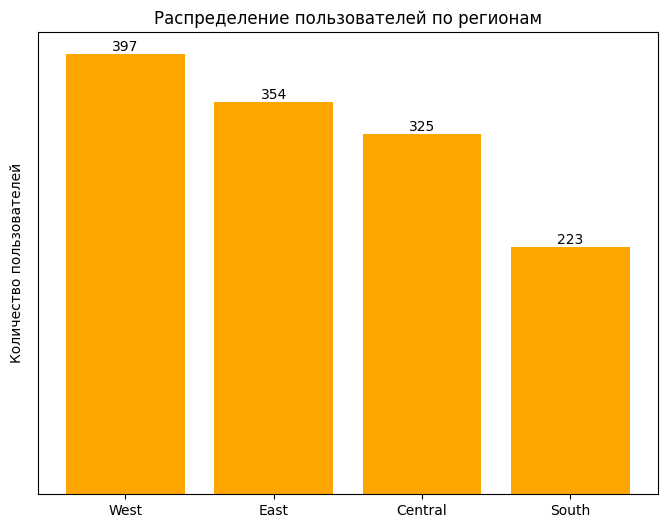

In [79]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(cnt_users_per_region.index, cnt_users_per_region.values, color='orange')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval}", ha='center', va='bottom')
# Настройка отображения
plt.title('Распределение пользователей по регионам')
plt.ylabel('Количество пользователей', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

Больше всего покупателей находится в западной части страны, 397 уникальных клиентов.

Штатов и городов уже намного больше, поэтому выведем только ТОП-10.

In [28]:
# Посчитаем количество пользователей в штатах
cnt_users_per_state = df.groupby('state')['customer_id'].nunique().sort_values(ascending=False)[:10]

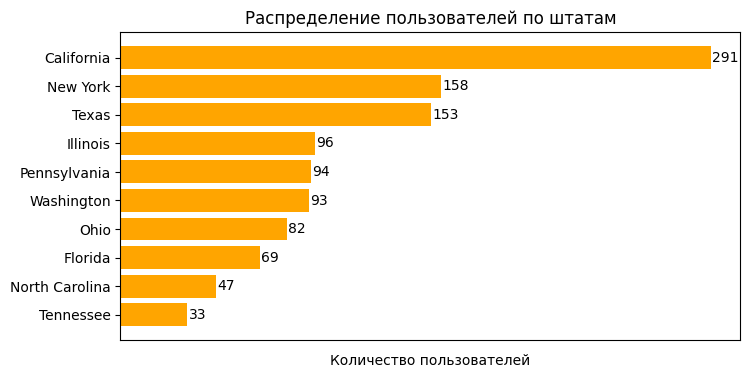

In [29]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(cnt_users_per_state.index, cnt_users_per_state.values, color='orange')
plt.gca().invert_yaxis()
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval+0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval}",
             ha='left', va='center')
# Настройка отображения
plt.title('Распределение пользователей по штатам')
plt.xlabel('Количество пользователей', labelpad=10)
plt.xticks([])
plt.grid(False)
plt.show()

Больше всего пользователей из Калифорнии, 291 человек. На втором и третьем месте Нью-Йорк и Техас, 158 и 153 человека соответственно.

In [30]:
# Посчитаем количество пользователей в городах
cnt_users_per_city = df.groupby('city')['customer_id'].nunique().sort_values(ascending=False)[:10]

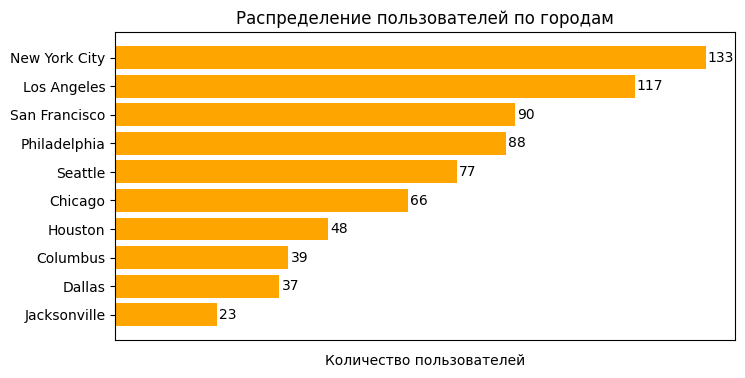

In [67]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(cnt_users_per_city.index, cnt_users_per_city.values, color='orange')
plt.gca().invert_yaxis()
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval+0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval}",
             ha='left', va='center')
# Настройка отображения
plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей', labelpad=10)
plt.xticks([])
plt.grid(False)
plt.show()

Больше всего покупателей из Нью-Йорка, 133 человека. Этот город считается самым густонаселенным. На втором и третьем месте по количеству покупателей Лос-Анджелес и Сан-Франциско, города из штата Калифорния, расположенного в западной части страны.

**Изучим динамику количества заказов**

In [32]:
# Создаем столбец в формате "год-месяц"
df['month'] = df['order_date'].dt.strftime('%Y-%m')

# Считаем количество заказов в каждом месяце
cnt_orders = df.groupby('month')['order_id'].nunique().sort_index()

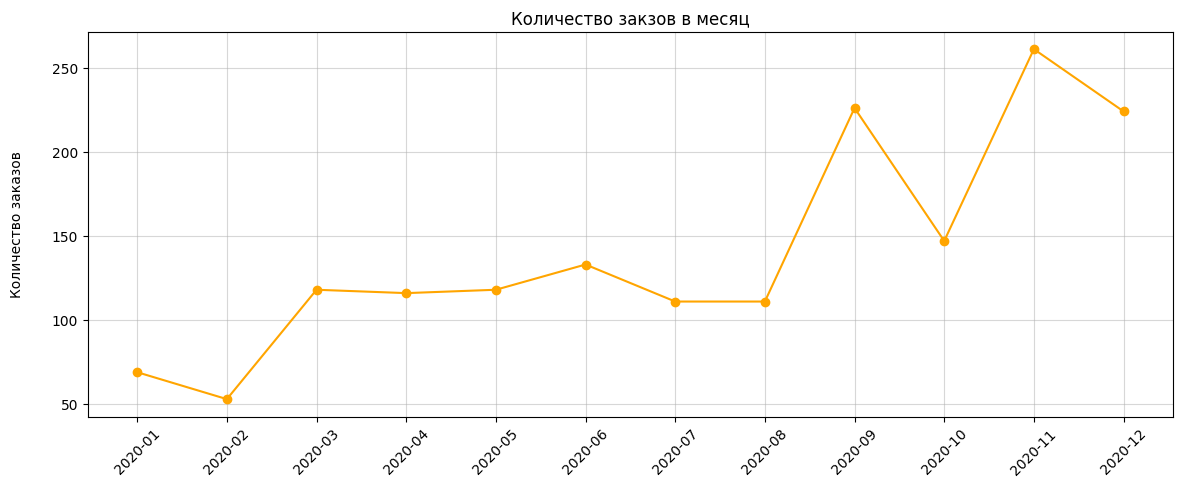

In [33]:
# Построение линейного графика
plt.figure(figsize=(14, 5))
plt.plot(cnt_orders.index, cnt_orders.values, marker='o', color='orange')
# Настройка отображения
plt.title('Количество закзов в месяц')
plt.ylabel('Количество заказов', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

В начале года в марте наблюдается рост заказов с 50 до 120. Далее этот показатель вплоть до августа находился практически без изменений, только в июне можно видеть небольшой рост. В следующие месяца можно наблюдать тренд резкого роста. В сентябре число заказов достигло отметки в 230, в октябре спад до 150, а в ноябре новый максимум - 260 заказов в месяц. Возможно такому росту способствовали удачные рекламные компании.

**Изучим динамику продаж по месяцам**

In [34]:
# Считаем сумму продаж по месяцам
sum_sales_month = df.groupby('month')['discount_sales'].sum().sort_index()

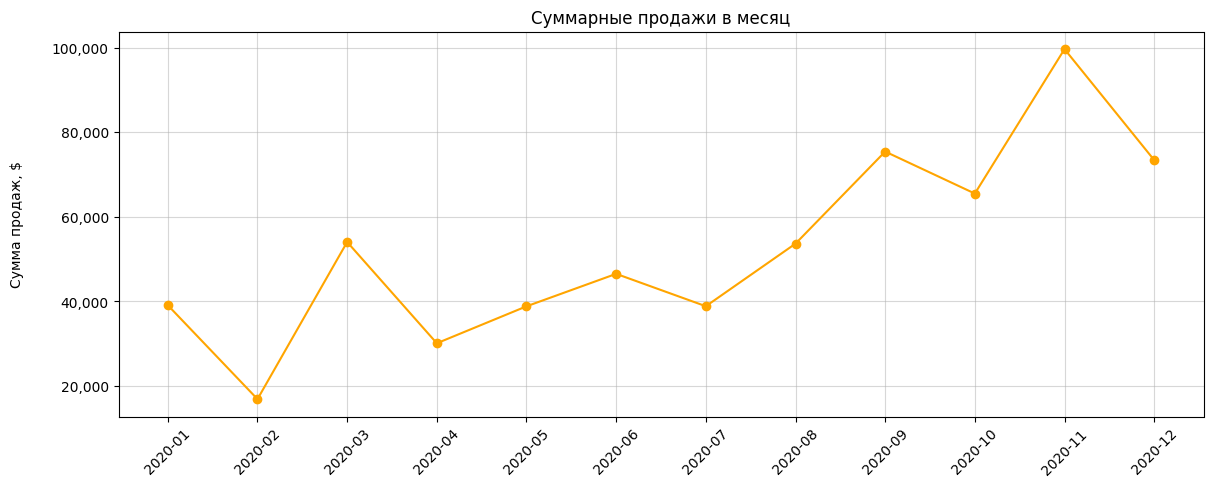

In [35]:
# Построение линейного графика
plt.figure(figsize=(14, 5))
plt.plot(sum_sales_month.index, sum_sales_month.values, marker='o', color='orange')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Суммарные продажи в месяц')
plt.ylabel('Сумма продаж, $', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

В динамике продаж, тоже видим восходящий тренд, достигающий максимума в ноябре - 100,000 \$. Рост продаж наблюдается практически в течении всего года, за исключением нескольких месяцев, в апреле, июле и октябре можно видеть небольшие спады продаж. А в конце года в декабре продажи упали довольно резко со 100,000 до 75,000 $.

**Изучим распределение продаж по категориям и подкатегориям товаров**

In [36]:
# Построим сводную таблицу и посчитаем сумму продаж
pivot_df = df.pivot_table(index=['category', 'sub_category'],
                          values='discount_sales',
                          aggfunc='sum').reset_index()

# Суммируем продажи только по категориям
categories_sales =  pivot_df.groupby('category')['discount_sales'].sum().sort_values(ascending=False)

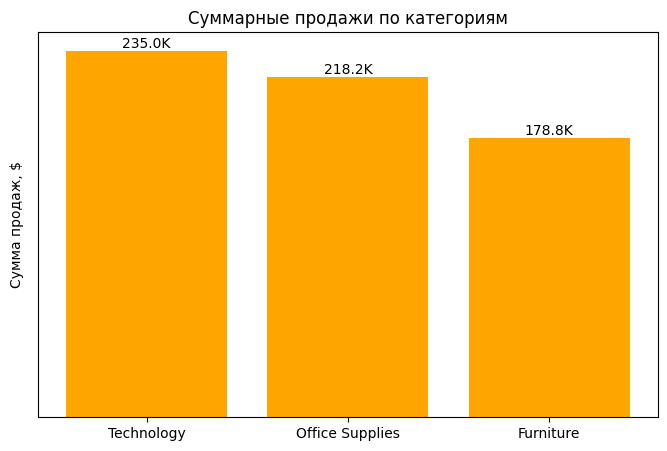

In [73]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(categories_sales.index, categories_sales.values, color='orange')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval/1000:.1f}K", ha='center', va='bottom')
# Настройка отображения
plt.title('Суммарные продажи по категориям')
plt.ylabel('Сумма продаж, $', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

Больше всего выручки принесли товары из категории "Technology" - 235,000 \$, возможно эти товары просто дороже остальных. Меньше всех принесла выручки категория "Furniture" - 178,800 $.

In [54]:
# Сортируем таблицу по категориям и сумме продаж
pivot_df = pivot_df.sort_values(by=['category', 'discount_sales'], ascending=[False, False])

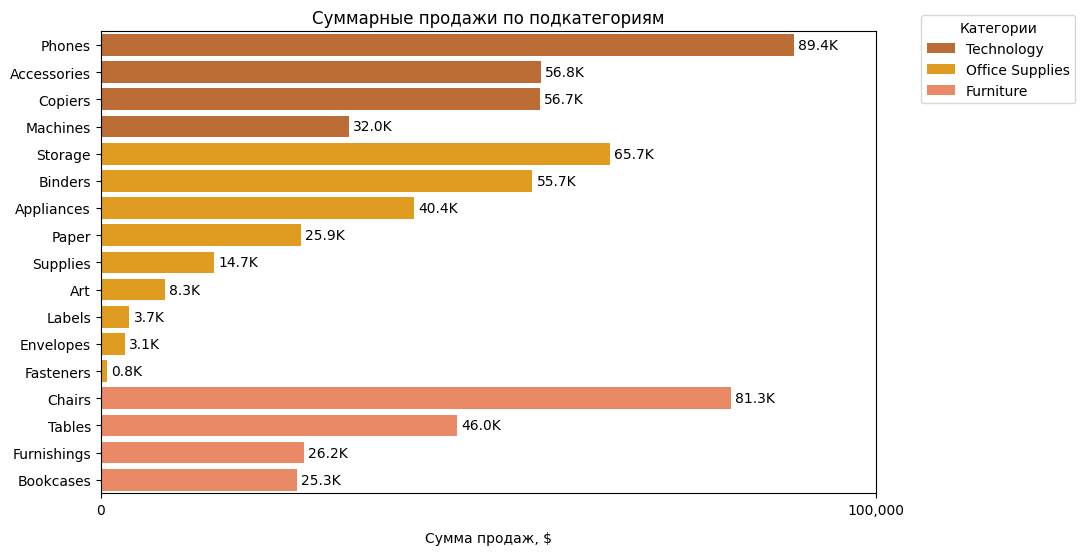

In [77]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pivot_df,
                 x='discount_sales',
                 y='sub_category',
                 hue='category',
                 palette=['chocolate', 'orange', 'coral'])
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Добавляем подписи значений
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x/1000:.1f}K', padding=3)
# Настройка отображения
plt.title('Суммарные продажи по подкатегориям')
plt.ylabel('')
plt.xlabel('Сумма продаж, $', labelpad=10)
plt.legend(title='Категории', bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.xticks([0, 100000])
plt.grid(False)
plt.show()

Если смотреть продажи по подкатегориям, то видно, что больше всего выручки принесли продажи телефонов - 89,400 \$, они находятся в категории "Technology". Также хорошую доход принесли продажи стульев из категории "Furniture" - 81,300 \$. Самая маленькая выручка у крепежей из категории "Office Supplies" - 800 $.

**Изучим распределение продаж по регионам, штатам и городам**

Начнем с регионов.

In [83]:
# Посчитаем продажи в регионах
sales_regions = df.groupby('region')['discount_sales'].sum().sort_values(ascending=False)

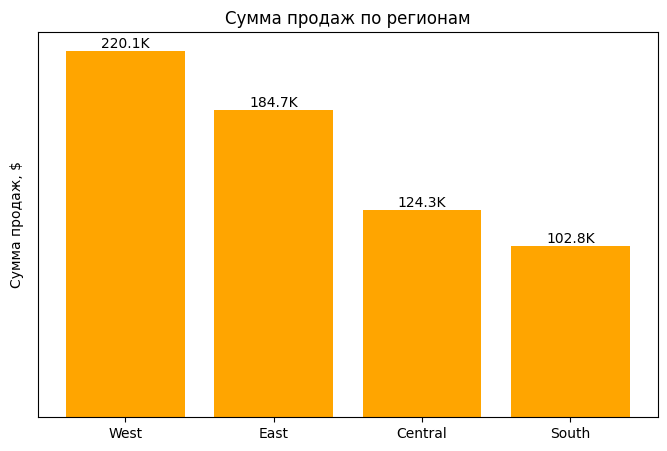

In [84]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_regions.index, sales_regions.values, color='orange')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval/1000:.1f}K", ha='center', va='bottom')
# Настройка отображения
plt.title('Сумма продаж по регионам')
plt.ylabel('Сумма продаж, $', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

По сумме продаж западный регион лидирует, также, как и по количеству пользователей. Суммарных продаж в этом регионе на 220,100 $.

Штатов и городов выведем только ТОП-10.

In [85]:
# Посчитаем продажи в штатах
sales_states = df.groupby('state')['discount_sales'].sum().sort_values(ascending=False)[:10]

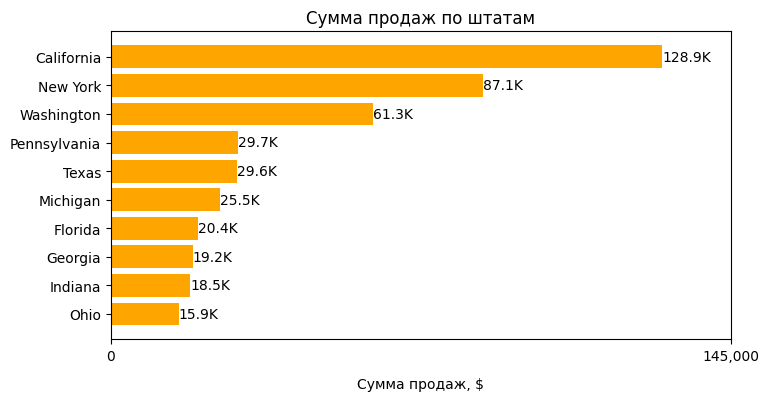

In [91]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(sales_states.index, sales_states.values, color='orange')
plt.gca().invert_yaxis()
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval+0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval/1000:.1f}K",
             ha='left', va='center')
# Настройка отображения
plt.title('Сумма продаж по штатам')
plt.xlabel('Сумма продаж, $', labelpad=10)
plt.xticks([0, 145000])
plt.grid(False)
plt.show()

В разрезе штатов лидеры прежние, Калифорния - 128,900 \$ и Нью-Йорк - 87,100 \$. А на третьем месте теперь Вашингтон - 61,300 \$, не смотря, что количество пользователей там меньше, чем в Техасе, но видимо они делают более дорогие покупки.

In [92]:
# Посчитаем продажи в городах
sales_cities = df.groupby('city')['discount_sales'].sum().sort_values(ascending=False)[:10]

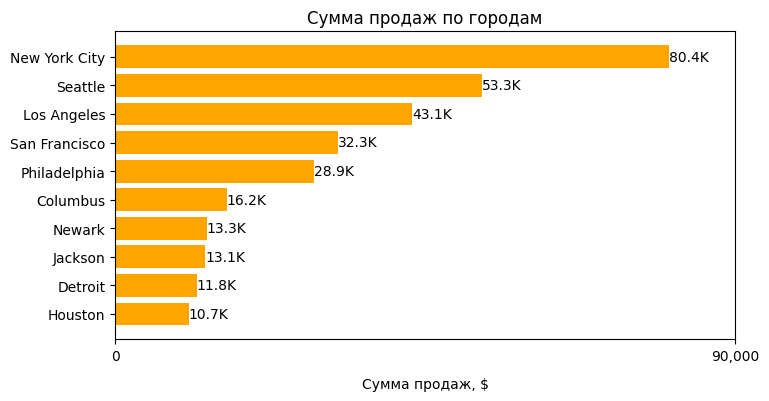

In [97]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(sales_cities.index, sales_cities.values, color='orange')
plt.gca().invert_yaxis()
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval+0.5,
             bar.get_y() + bar.get_height()/2,
             f"{xval/1000:.1f}K",
             ha='left', va='center')
# Настройка отображения
plt.title('Сумма продаж по городам')
plt.xlabel('Сумма продаж, $', labelpad=10)
plt.xticks([0, 90000])
plt.grid(False)
plt.show()

По продажам среди городов лидирует Нью-Йорк - 80,400 \$. На втором месте Сиэтл - 53,300 \$, хотя количество пользователей там меньше, чем Лос-Анджелес или Сан-Франциско.

**Посмотрим самые популярные товары**

In [98]:
# Найдем ТОП-10 часто заказываемых товаров
top_products = df.groupby('product_name')['order_id'].count().sort_values(ascending=False)[:10]

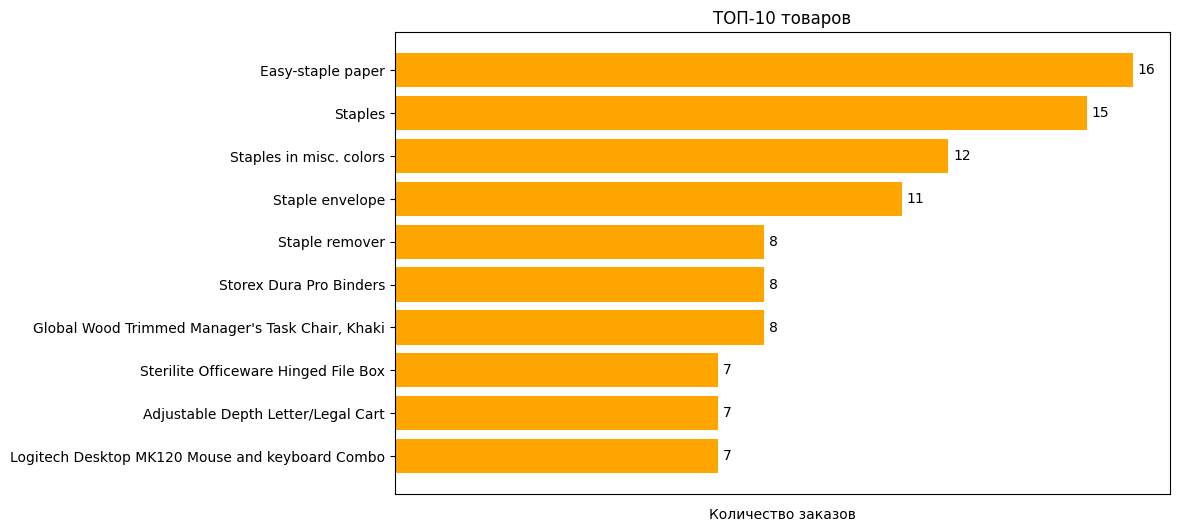

In [103]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
bars = plt.barh(top_products.index, top_products.values, color='orange')
plt.gca().invert_yaxis()
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()
    plt.text(xval+0.1,
             bar.get_y() + bar.get_height()/2,
             f"{xval}",
             ha='left', va='center')
# Настройка отображения
plt.title('ТОП-10 товаров')
plt.xlabel('Количество заказов', labelpad=10)
plt.xticks([])
plt.grid(False)
plt.show()

Самые популярные товары - это скобы разного вида, они занимают первые пять пунктов.

**Посмотрим распределение категорий по регионам**

In [106]:
# Считаем сколько раз каждая категория встречается в заказах по регионам
category_in_regions = df.groupby(['region', 'category'], observed=True).size().reset_index(name='count')

# Вычисляем процентное соотношение внутри каждого региона
category_in_regions['total_count'] = category_in_regions.groupby('region', observed=True)['count'].transform('sum')
category_in_regions['percentage'] = (category_in_regions['count'] / category_in_regions['total_count']) * 100

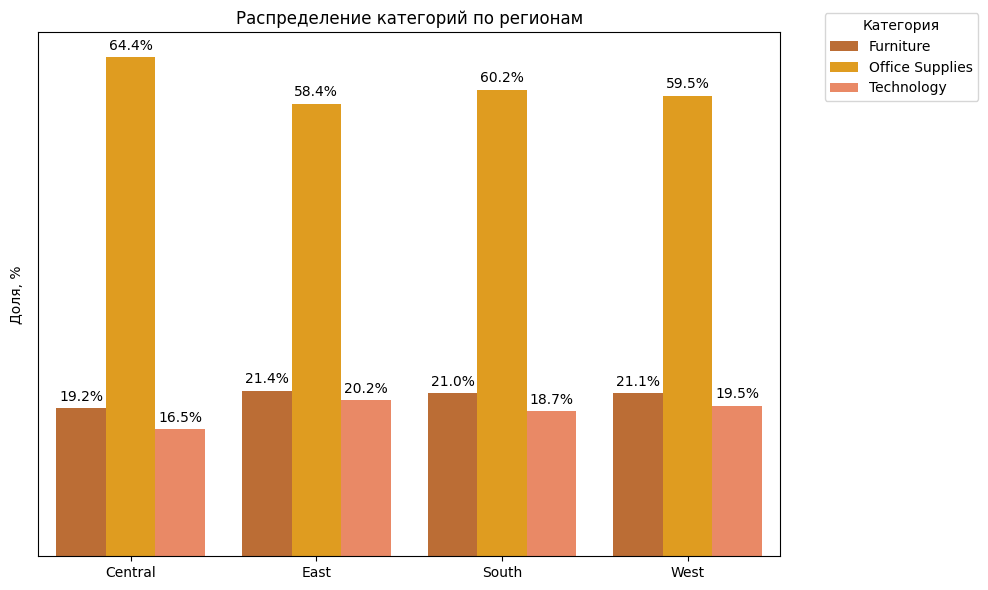

In [109]:
# Строим график
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=category_in_regions,
                x='region',
                y='percentage',
                hue='category',
                palette=['chocolate', 'orange', 'coral'])
# Добавляем значения
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
# Настройка отображения
plt.title('Распределение категорий по регионам')
plt.xlabel('')
plt.ylabel('Доля, %', labelpad=10)
plt.yticks([])
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.tight_layout()
plt.show()

По всем регионам схожее распределение, самые часто встречаемые товары из категории "Office Supplies".

**Посмотрим динамику продаж по каждой категории**

In [112]:
# Считаем сумму продаж по месяцам в каждой категории
sales_in_categories = df.groupby(['month', 'category'], observed=True)['discount_sales'].sum().sort_index().reset_index()

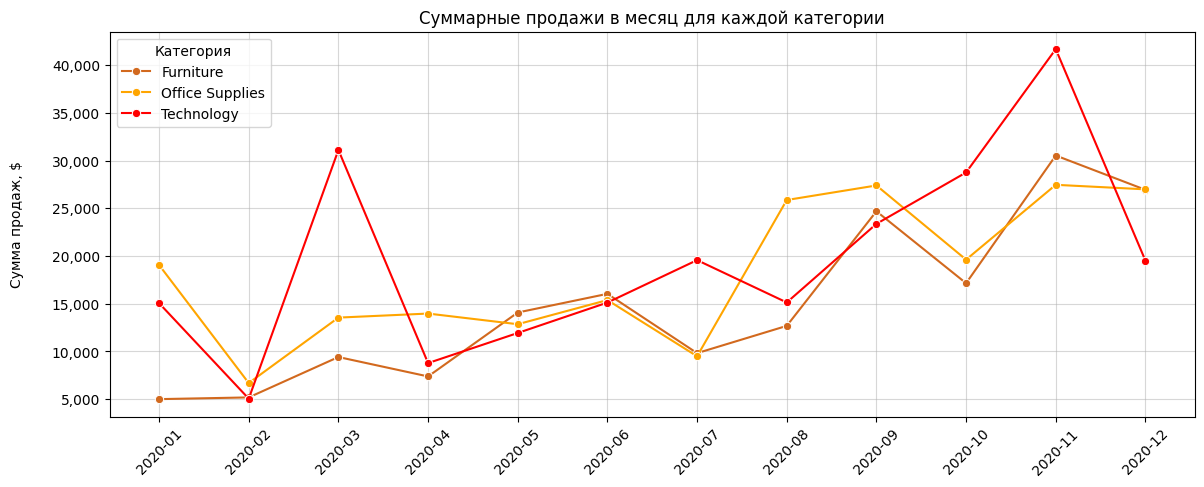

In [117]:
# Построение линейного графика
plt.figure(figsize=(14, 5))
sns.lineplot(data=sales_in_categories, x='month', y='discount_sales', hue='category',
             marker='o', palette=['chocolate', 'orange', 'red'])
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Суммарные продажи в месяц для каждой категории')
plt.ylabel('Сумма продаж, $', labelpad=20)
plt.xlabel('')
plt.legend(title='Категория')
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

Тенденция продаж внутри каждой категории схожа с общим графиком продаж, в течении всего года по каждой категории наблюдается плавный рост. Также у каждой категории можно заметить свои всплески и падения. Так например, продажи в категории "Technology" имеют резкий отличительный рост в марте и такой же резкий спад в следующем месяце. В августе можно отметить резкий спрос на товары из категории "Office Supplies", возможно это связано с началом учебного года. В октябре продажи по категориям "Office Supplies" и "Furniture" упали, а продажи по категории "Technology" наоборот выросли, но в конце года продажи по категории "Technology" резко упали, намного сильнее других категорий.

# Выводы исследовательского анализа

* В предоставленных данных было 3312 строк, 1687 уникальных заказов и 693 уникальных покупателя. Это значит, что некоторые клиенты делали несколько заказов. В среднем на одного покупателя выходит два заказа.
* Распределение правое асимметричное, что говорит о преимуществе небольших покупок. 50% заказов делают на сумму от 29.3 до 396.1 \$, с медианой - 124.8 \$. 9% от всех заказов сделаны на сумму более 1,000 \$, из них очень редкие заказы, сумма которых превышает 6,000 \$.
* Больше всего покупателей находится в западной части страны, 397 уникальных клиентов, из них 291 человек из Калифорнии. Также много пользователей из штатов Нью-Йорк и Техас, 158 и 153 человека соответственно. Если рассматривать города, то больше всего покупателей из Нью-Йорка, 133 человека. На втором и третьем месте по количеству покупателей Лос-Анджелес и Сан-Франциско, города из штата Калифорния.
* В начале года в марте наблюдается рост заказов с 50 до 120. Далее этот показатель вплоть до августа находился практически без изменений, только в июне можно видеть небольшой рост. В следующие месяца можно наблюдать тренд резкого роста. В сентябре число заказов достигло отметки в 230, в октябре спад до 150, а в ноябре новый максимум - 260 заказов в месяц. Возможно такому росту способствовали удачные рекламные компании.
* В динамике продаж, тоже видим восходящий тренд, достигающий максимума в ноябре - 100,000 \$. Рост продаж наблюдается практически в течении всего года, за исключением нескольких месяцев, в апреле, июле и октябре можно видеть небольшие спады продаж. А в конце года в декабре продажи упали довольно резко со 100,000 до 75,000 \$.
* Больше всего выручки принесли товары из категории "Technology" - 235,000 \$, возможно эти товары просто дороже остальных. Меньше всех принесла выручки категория "Furniture" - 178,800 \$.
* Если смотреть продажи по подкатегориям, то видно, что больше всего выручки принесли продажи телефонов - 89,400 \$, они находятся в категории "Technology". Также хорошую доход принесли продажи стульев из категории "Furniture" - 81,300 \$. Самая маленькая выручка у крепежей из категории "Office Supplies" - 800 \$.
* По сумме продаж западный регион лидирует, также, как и по количеству пользователей. Суммарных продаж в этом регионе на 220,100 \$. По продажам среди городов лидирует Нью-Йорк - 80,400 \$. На втором месте Сиэтл - 53,300 \$, хотя количество пользователей там меньше, чем Лос-Анджелес или Сан-Франциско. По продажам среди городов лидирует Нью-Йорк - 80,400 \$. На втором месте Сиэтл - 53,300 \$, хотя количество пользователей там меньше, чем Лос-Анджелес или Сан-Франциско.
* Самые популярные товары - это скобы разного вида.
* Если наблюдать продажи по категориям внутри регионов, то заметим схожее распределение, самые часто встречаемые товары из категории "Office Supplies".
* Тенденция продаж внутри каждой категории схожа с общим графиком продаж, в течении всего года по каждой категории наблюдается плавный рост. Также у каждой категории можно заметить свои всплески и падения. Так например, продажи в категории "Technology" имеют резкий отличительный рост в марте и такой же резкий спад в следующем месяце. В августе можно отметить резкий спрос на товары из категории "Office Supplies", возможно это связано с началом учебного года. В октябре продажи по категориям "Office Supplies" и "Furniture" упали, а продажи по категории "Technology" наоборот выросли, но в конце года продажи по категории "Technology" резко упали, намного сильнее других категорий.